In [1]:
import pandas as pd

In [2]:
# df = dataframe

df = pd.read_csv("./PLZO_CSV_LV95/PLZO_CSV_LV95.csv", encoding='UTF-8', delimiter=';')

In [3]:
df

,Ortschaftsname,PLZ,Zusatzziffer,Gemeindename,BFS-Nr,Kantonskürzel,E,N,Sprache
0,Aeugst am Albis,8914,0,Aeugst am Albis,1,ZH,2679435.817,1235653.185,de
1,Aeugstertal,8914,2,Aeugst am Albis,1,ZH,2679815.475,1237410.215,de
2,Zwillikon,8909,0,Affoltern am Albis,2,ZH,2675104.519,1237890.488,de
3,Affoltern am Albis,8910,0,Affoltern am Albis,2,ZH,2676439.358,1236966.371,de
4,Bonstetten,8906,0,Bonstetten,3,ZH,2677798.571,1241024.843,de
...,...,...,...,...,...,...,...,...,...
4121,Ruggell,9491,0,Ruggell,7010,NaN,2758240.812,1234338.738,de
4122,Schellenberg,9488,0,Schellenberg,7011,NaN,2759569.643,1233302.721,de
4123,Thunersee,9999,1,Thunersee,9073,BE,2621181.563,1170794.308,de
4124,Brienzersee,9999,2,Brienzersee,9089,BE,2640931.114,1175395.654,de


In [7]:
df.query("PLZ == 4132")

,Ortschaftsname,PLZ,Zusatzziffer,Gemeindename,BFS-Nr,Kantonskürzel,E,N,Sprache
1648,Muttenz,4132,0,Muttenz,2770,BL,2616256.811,1263384.376,de


In [9]:
df.query("Kantonskürzel == 'BL'")

,Ortschaftsname,PLZ,Zusatzziffer,Gemeindename,BFS-Nr,Kantonskürzel,E,N,Sprache
1638,Aesch BL,4147,0,Aesch (BL),2761,BL,2611908.915,1257353.669,de
1639,Allschwil,4123,0,Allschwil,2762,BL,2607303.243,1266660.248,de
1640,Arlesheim,4144,0,Arlesheim,2763,BL,2614177.125,1260497.459,de
1641,Biel-Benken BL,4105,0,Biel-Benken,2764,BL,2606077.411,1261427.510,de
1642,Bruderholz,4101,0,Binningen,2765,BL,2610804.279,1264214.565,de
...,...,...,...,...,...,...,...,...,...
1721,Niederdorf,4435,0,Niederdorf,2891,BL,2623469.695,1251006.234,de
1722,Oberdorf BL,4436,0,Oberdorf (BL),2892,BL,2623799.489,1248987.353,de
1723,Reigoldswil,4418,0,Reigoldswil,2893,BL,2618724.395,1249983.221,de
1724,Titterten,4425,0,Titterten,2894,BL,2621204.076,1250380.693,de


In [21]:
import geoutils

url= 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson'

geoutils.download(url, "geodata/2.5_week.json")

import geopandas as gpd

quakes = gpd.read_file("geodata/2.5_week.json")

In [22]:
quakes.head(3)

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,nc73858060,2.63,"32km WSW of San Simeon, CA",1679039091460,1679039474506,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",nc,",",focal-mechanism,nearby-cities,origin,phase-da...",46.0,0.3281,0.35,223.0,md,earthquake,"M 2.6 - 32km WSW of San Simeon, CA",POINT Z (-121.52550 35.55600 -0.30000)
1,pr2023076001,3.79,"67 km N of Charlotte Amalie, U.S. Virgin Islands",1679037751650,1679039389994,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,pr,",",origin,phase-data,",17.0,0.5996,0.35,264.0,md,earthquake,"M 3.8 - 67 km N of Charlotte Amalie, U.S. Virg...",POINT Z (-64.99050 18.95230 50.00000)
2,ci40185807,3.17,"38km ENE of Maneadero, B.C., MX",1679034136390,1679035685040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ci,us,",",nearby-cities,origin,phase-data,scitech-link,",33.0,0.2673,0.24,179.0,ml,earthquake,"M 3.2 - 38km ENE of Maneadero, B.C., MX",POINT Z (-116.19883 31.84317 10.37000)


In [24]:
quakes2 = quakes[['time', 'mag', 'place', 'geometry']]

quakes2.head(4)

,time,mag,place,geometry
0,1679039091460,2.63,"32km WSW of San Simeon, CA",POINT Z (-121.52550 35.55600 -0.30000)
1,1679037751650,3.79,"67 km N of Charlotte Amalie, U.S. Virgin Islands",POINT Z (-64.99050 18.95230 50.00000)
2,1679034136390,3.17,"38km ENE of Maneadero, B.C., MX",POINT Z (-116.19883 31.84317 10.37000)
3,1679032831810,2.89,Puerto Rico region,POINT Z (-66.95800 17.94117 6.89000)


<AxesSubplot: >

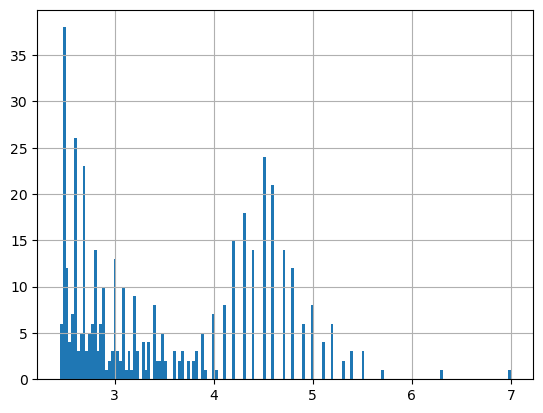

In [27]:
quakes2.mag.hist(bins=160)

In [31]:
quakes2.sort_values(["mag"], ascending=False)

,time,mag,place,geometry
63,1678928162207,7.00,Kermadec Islands region,POINT Z (-176.11160 -30.11470 22.06500)
199,1678754948501,6.30,"119 km E of Madang, Papua New Guinea",POINT Z (146.85370 -5.40580 213.00000)
288,1678607000334,5.70,"147 km S of Lata, Solomon Islands",POINT Z (165.82470 -12.05770 10.00000)
188,1678767887939,5.50,Pacific-Antarctic Ridge,POINT Z (-141.75000 -56.60340 10.00000)
143,1678823798955,5.50,"169 km WSW of Lebu, Chile",POINT Z (-75.28510 -38.42140 7.47900)
...,...,...,...,...
263,1678660418750,2.47,"9km E of Somes Bar, CA",POINT Z (-123.37183 41.38483 4.43000)
216,1678732271240,2.47,"5 km ESE of West Yellowstone, Montana",POINT Z (-111.04917 44.63833 7.95000)
376,1678495578280,2.46,"98 km W of Adak, Alaska",POINT Z (-178.06750 51.84900 3.49000)
54,1678939550220,2.46,"5 km SW of Guánica, Puerto Rico",POINT Z (-66.95300 17.93917 6.94000)


<AxesSubplot: >

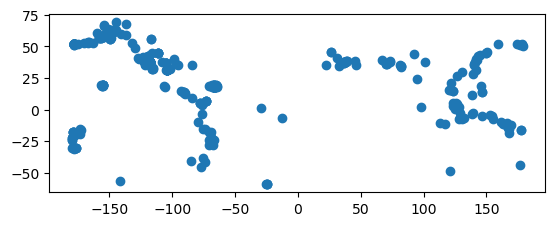

In [32]:
quakes2.plot()

In [33]:
countries = gpd.read_file("../Lektion1/geodata/packages/natural_earth_vector.gpkg", layer = "ne_110m_admin_0_countries", encoding = "utf-8")

In [34]:
countries.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


<AxesSubplot: >

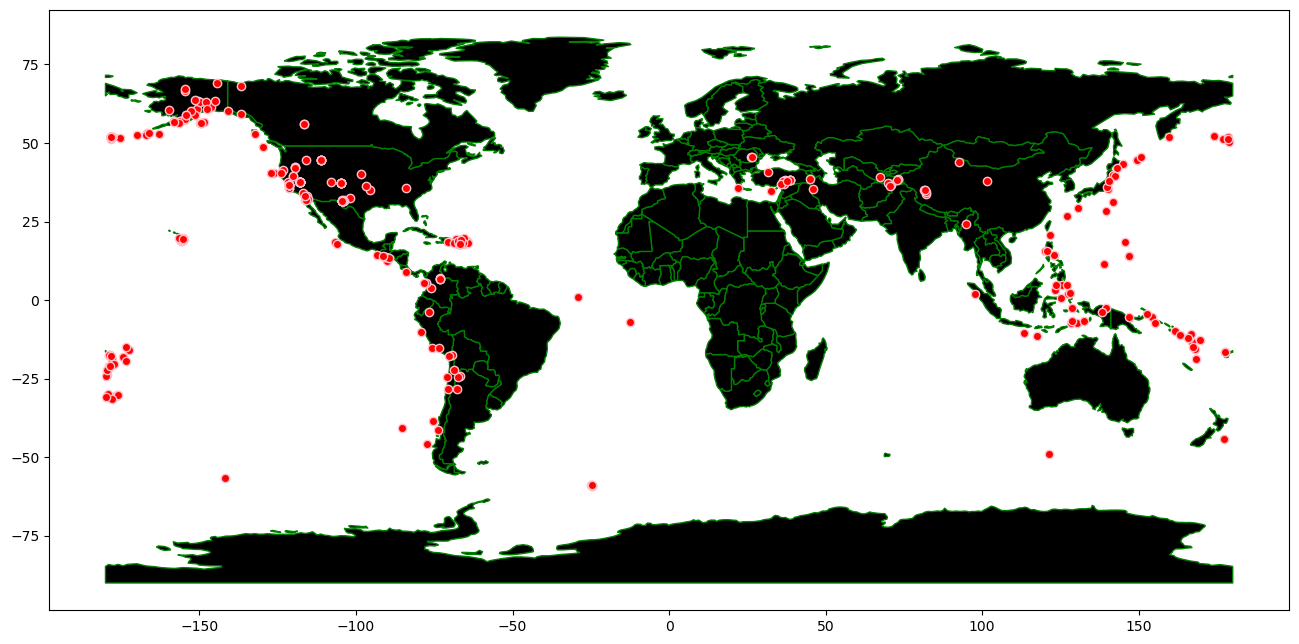

In [42]:
cax = countries.plot(figsize=(16,9), facecolor="black", edgecolor="green")
quakes2.plot(ax = cax, color = "red", edgecolor="pink")

In [43]:
import geoplot
#TODO

In [45]:
url = "https://dam-api.bfs.admin.ch/hub/api/dam/assets/24106754/master"

geoutils.download(url, "geodata/gemeindegrenzen.zip")

In [46]:
import zipfile

with zipfile.ZipFile("geodata/gemeindegrenzen.zip") as z:
    z.extractall("geodata")

In [47]:
kantone = gpd.read_file("geodata/ag-b-00.03-875-gg23/ggg_2023_LV95/shp/g1k23.shp", encoding = 'utf-8')

In [51]:
kantone.head(3)

,KTNR,KTNAME,GRNR,AREA_HA,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,Z_MIN,Z_MAX,Z_AVG,Z_MED,geometry
0,1,Zürich,4,172894,2669245,2716900,1223896,1283343,2691800,1252000,330,1291,533,505,"POLYGON ((2692443.000 1281183.000, 2692994.000..."
1,2,Bern / Berne,2,595850,2556241,2677745,1130585,1243835,2614200,1185600,399,4271,1199,980,"MULTIPOLYGON (((2576863.000 1196521.000, 25771..."
2,3,Luzern,6,149352,2630128,2681764,1180568,1237691,2651000,1213100,399,2347,771,680,"POLYGON ((2662029.000 1237691.000, 2662264.000..."


<AxesSubplot: >

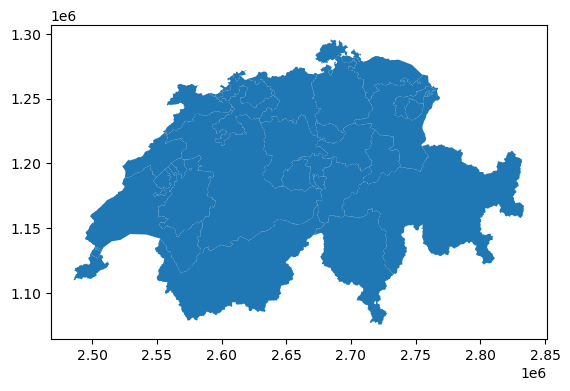

In [49]:
kantone.plot()

In [52]:
kantone2 = kantone[["KTNR", "KTNAME", "AREA_HA", "geometry"]]

kantone2.head(3)

,KTNR,KTNAME,AREA_HA,geometry
0,1,Zürich,172894,"POLYGON ((2692443.000 1281183.000, 2692994.000..."
1,2,Bern / Berne,595850,"MULTIPOLYGON (((2576863.000 1196521.000, 25771..."
2,3,Luzern,149352,"POLYGON ((2662029.000 1237691.000, 2662264.000..."


In [53]:
#kantone2.to_file("geodata/kantone.shp")

In [104]:
kantone2.query("KTNAME == 'Aargau'")

,KTNR,KTNAME,AREA_HA,geometry
18,19,Aargau,140380,"POLYGON ((2659060.000 1273203.000, 2659200.699..."


In [105]:
df3 = kantone2.query("AREA_HA > 500000")

<AxesSubplot: >

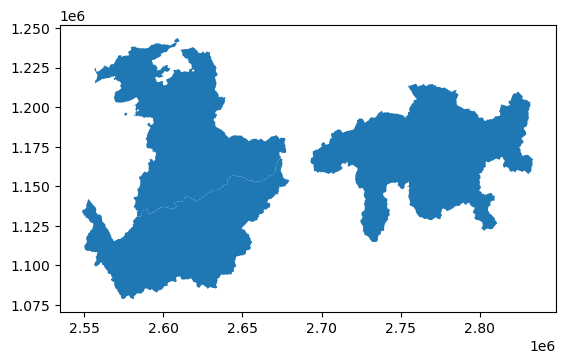

In [106]:
df3.plot()

In [107]:
kantone2.crs

<Projected CRS: EPSG:2056>
Name: CH1903+ / LV95
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - Liechtenstein and Switzerland
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1995
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903+
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

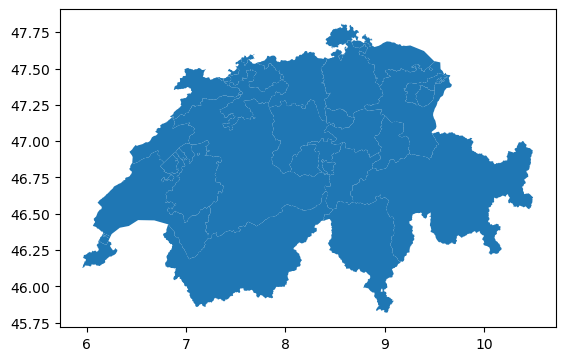

In [108]:
kantoneWGS84 = kantone2.to_crs(epsg=4326).plot()

In [110]:
import folium

m = folium.Map([47, 8], zoom_start= 8)

folium.GeoJson(kantone2).add_to(m)

m

In [79]:
gemeinden = gpd.read_file("geodata/ag-b-00.03-875-gg23/ggg_2023_LV95/shp/g1g23.shp", encoding = "utf-8")



<AxesSubplot: >

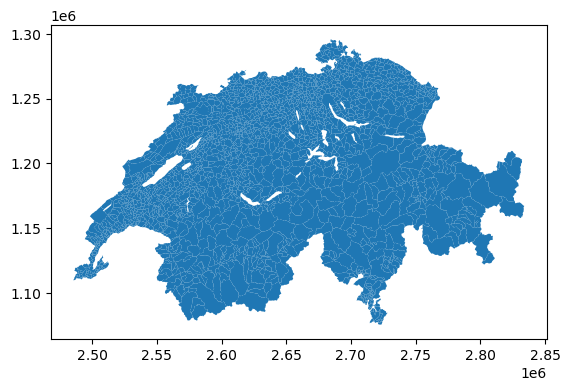

In [80]:
gemeinden.plot()

In [83]:
gemeinden.query("GMDNAME == 'Muttenz'")

,GMDHISTID,GMDNR,GMDNAME,BZHISTID,BZNR,KTNR,GRNR,AREA_HA,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,Z_MIN,Z_MAX,Z_AVG,Z_MED,Z_CNTR,geometry
904,13833,2770,Muttenz,10092,1301,13,3,1665,2613778,2617809,1260446,1266795,2615100,1264300,253,645,335,286,283,"POLYGON ((2615720.000 1260960.000, 2615622.000..."


In [85]:
gemeinden.query("AREA_HA >25000 and AREA_HA < 30000")

,GMDHISTID,GMDNR,GMDNAME,BZHISTID,BZNR,KTNR,GRNR,AREA_HA,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,Z_MIN,Z_MAX,Z_AVG,Z_MED,Z_CNTR,geometry
1164,16052,3792,Bregaglia,10312,1846,18,5,25142,2755110,2780603,1128447,1144948,2765600,1134700,665,3375,2217,2311,987,"POLYGON ((2755110.249 1142501.131, 2755873.000..."
1178,16047,3851,Davos,10315,1849,18,5,28400,2770475,2793120,1171440,1192614,2782200,1185700,1051,3145,2160,2203,1537,"POLYGON ((2780472.000 1189520.000, 2781305.000..."


In [88]:
from shapely.geometry import Point

FHNW = Point(2615044, 1264828)



In [89]:
gemeinden.contains(FHNW)

0       False
1       False
2       False
3       False
4       False
        ...  
2134    False
2135    False
2136    False
2137    False
2138    False
Length: 2139, dtype: bool

In [91]:
result = gemeinden[gemeinden.contains(FHNW)]

<AxesSubplot: >

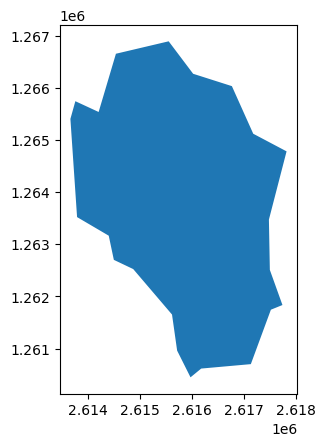

In [92]:
result.plot()

In [93]:
result

,GMDHISTID,GMDNR,GMDNAME,BZHISTID,BZNR,KTNR,GRNR,AREA_HA,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,Z_MIN,Z_MAX,Z_AVG,Z_MED,Z_CNTR,geometry
904,13833,2770,Muttenz,10092,1301,13,3,1665,2613778,2617809,1260446,1266795,2615100,1264300,253,645,335,286,283,"POLYGON ((2615720.000 1260960.000, 2615622.000..."
